# Surface regression using 1-hidden layer MLP

## Introduction
Objective: use a MLP as a regressor for 2D surface reconstruction

In [1]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

2024-10-27 14:49:08.490575: E external/local_xla/xla/stream_executor/plugin_registry.cc:93] Invalid plugin kind specified: DNN
2024-10-27 14:49:08.541031: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Global parameters

In [2]:
num_hidden = 5      # number of neurons in the hidden layer
num_epochs = 500     # number of training epochs
num_points = 100    # number of points for surface display

## Library of functions

In [3]:
# domain definition
#xmin,xmax =  -10,10
#ymin,ymax =  -10,10
#num_samples = 400   # number of sample point for the training 
#f = lambda x, y: 0.01*np.sin(np.sqrt(x*x + y*y + 1))/np.sqrt(x*x + y*y + 1)

#xmin,xmax =  -1,1
#ymin,ymax =  -1,1
#num_samples = 30
#f =  lambda x, y: np.sin(x) + np.cos(y)*x**2

xmin,xmax =  -3,3
ymin,ymax =  -3,3
num_samples = 100
f =  lambda x, y: 3*np.exp(-(y+1)**2 -x**2)*(x-1)**2 -np.exp(-(x-1)**2-y**2)/3 +np.exp(-x**2-y**2)*(10*x**3-2*x+10*y**5)

# Beale surface
#xmin,xmax =  -4,4
#ymin,ymax =  -4,4
#num_samples = 50
#f =  lambda x, y: (1.5-x+x*y)**2 + (2.25-x+x*y**2)**2+(2.625-x+x*y**3)**2

#xmin,xmax =  -4,4
#ymin,ymax =  -4,4
#num_samples = 50
#f =  lambda x, y: (y-(5.1 / (4.*np.pi**2))*x**2+(5. / np.pi)*x-6)+10*(1-(1. / (8.*np.pi)))*np.cos(x)+10



##Surface and sample points.


/tmp/ipykernel_609682/2756091863.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_train, Y_train, Z_train, cmap='plasma')


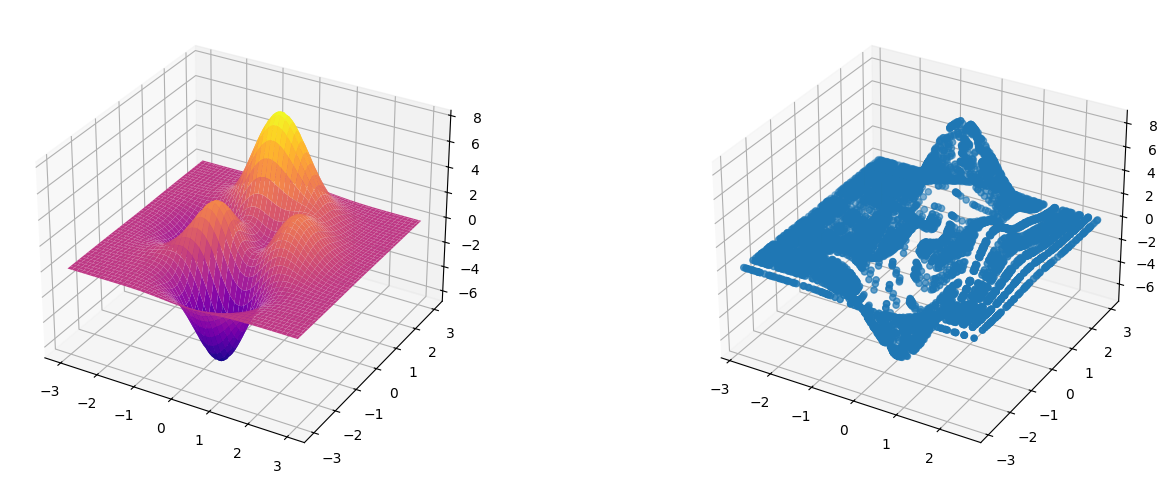

<Figure size 1000x1000 with 0 Axes>

In [4]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, projection='3d')
x = np.linspace(xmin, xmax, num_points)
y = np.linspace(ymin, ymax, num_points)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
ax.plot_surface(X, Y, Z, cmap='plasma')

ax = fig.add_subplot(122, projection='3d')
x_train = (xmax-xmin)*np.random.rand(num_samples,1)+xmin
y_train = (ymax-ymin)*np.random.rand(num_samples,1)+ymin
X_train,Y_train = np.meshgrid(x_train,y_train)
Z_train = f(X_train,Y_train)
plt.figure(figsize=(10,10))
ax.scatter(X_train, Y_train, Z_train, cmap='plasma')

plt.tight_layout()

## Network

In [5]:
#TODO: model definition
model = Sequential()
model.add(Dense(num_hidden, input_dim=2, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-10-27 14:51:59.386002: I external/local_xla/xla/stream_executor/rocm/rocm_gpu_executor.cc:773] could not open file to read NUMA node: /sys/bus/pci/devices/0000:00:01.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 14:51:59.434157: I external/local_xla/xla/stream_executor/rocm/rocm_gpu_executor.cc:773] could not open file to read NUMA node: /sys/bus/pci/devices/0000:00:01.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 14:51:59.434212: I external/local_xla/xla/stream_executor/rocm/rocm_gpu_executor.cc:773] could not open file to read NUMA node: /sys/bus/pci/devices/0000:00:01.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 14:51:59.436348: I external/local_xla/xla/stream_executor/rocm/rocm_gpu_executor.cc:773] could not open file to read NUMA node: /sys/bus/pci/devices/0000:00:01.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-27 14:51:59.436429: I external/local_xla/xla

In [6]:
#TODO: loss function and optimizer
model.compile(optimizer='adam', loss='mse')

2024-10-27 14:52:04.789212: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:04.791934: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:04.792561: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:04.797032: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:04.799204: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


## Training

In [7]:
pts = np.transpose(np.vstack([x_train.ravel(), y_train.ravel()]))
hist=model.fit(pts, f(x_train,y_train), epochs=num_epochs, batch_size=1,verbose=0)

2024-10-27 14:52:07.892812: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:07.896892: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:07.909462: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:07.911384: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:07.927512: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:07.929322: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:07.932217: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:07.934924: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:07.948260: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:52:07

## Display results

 27/313 [=>............................] - ETA: 0s 

2024-10-27 14:54:14.787358: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:14.788791: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:14.802929: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:14.804326: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:14.826420: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:14.827827: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:14.829645: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:14.830934: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:14.837409: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:14

313/313 [==============================] - 1s 2ms/step


2024-10-27 14:54:15.619270: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:15.620580: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:15.726117: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:15.755409: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:15.757549: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:15.759947: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-10-27 14:54:15.774555: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


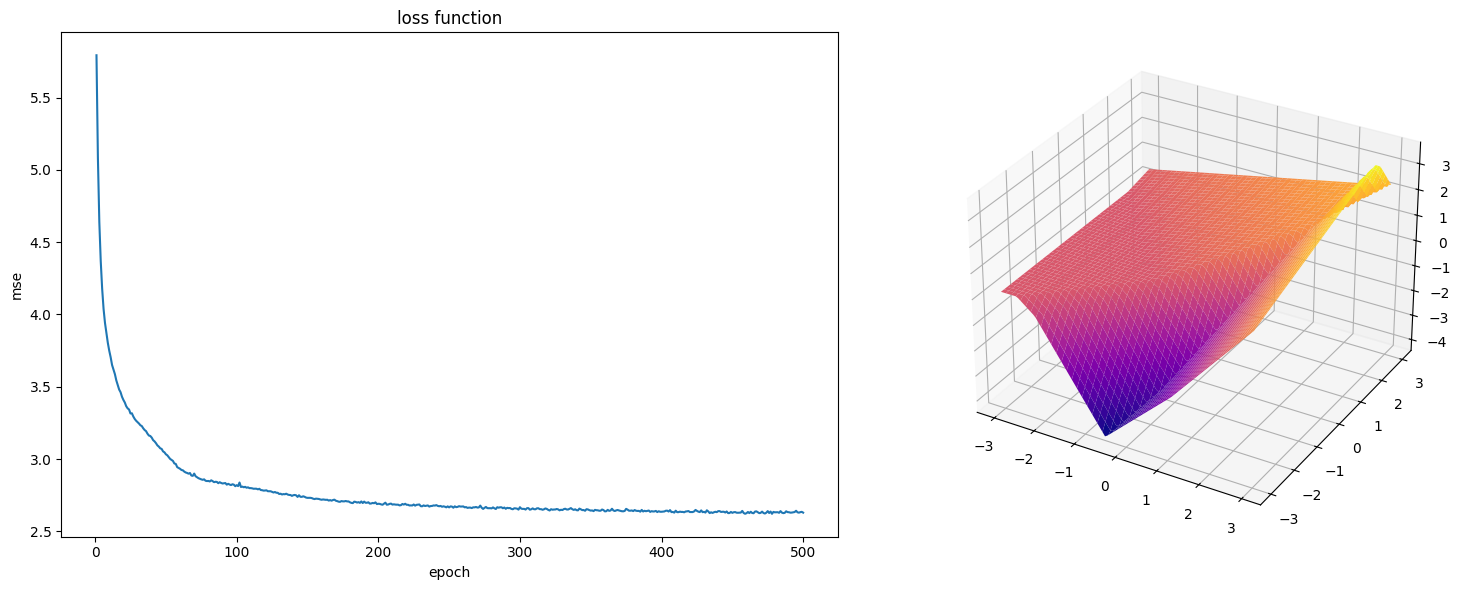

In [8]:
fig = plt.figure(figsize=(16, 6))
fig.add_subplot(121)
iter = list(range(1,num_epochs+1))
l = hist.history['loss']
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title("loss function")
plt.plot(iter,l)

ax = fig.add_subplot(122, projection='3d')
points = np.transpose(np.vstack([X.ravel(), Y.ravel()]))
z_P = model.predict(points)

z_P=z_P.reshape(num_points,num_points)
ax.plot_surface(X, Y, z_P, cmap='plasma')

plt.tight_layout()
